In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading CSV data 
data = pd.read_csv('full.csv')  

In [3]:
data.head()
df=data

In [4]:
data.describe()

,commit,author,date,message,repo
count,4336299,4336299,4336299,4335969,4336299
unique,4336299,89436,4268305,4217715,34
top,692bba578efb5e305c9b116568e5aad75b3fdbb3,chromium-autoroll <chromium-autoroll@skia-publ...,Wed Nov 1 03:56:19 2017 +1000,Merge remote-tracking branch 'origin/master' i...,torvalds/linux
freq,1,36339,137,12753,998326


In [5]:
data=data.dropna()

In [6]:
data

,commit,author,date,message,repo
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,Wed Apr 21 12:27:07 2021 +0800,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,Wed Apr 21 01:23:07 2021 +0200,Add keyword sort to pivot_table (#40954),pandas-dev/pandas
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:21:22 2021 +0200,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:01:03 2021 +0200,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,Tue Apr 20 23:58:18 2021 +0100,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas
...,...,...,...,...,...
4336294,43a17862477d0b2b7fb825ffd2a00ac193d2f771,Johannes Rieken <johannes.rieken@gmail.com>,Fri Nov 13 16:36:52 2015 +0100,jsdoc fot vscode.d.ts,microsoft/vscode
4336295,e3281e77cb1b684787971fef7985002583ec843a,Johannes Rieken <johannes.rieken@gmail.com>,Fri Nov 13 15:18:17 2015 +0100,remove commented extension reference,microsoft/vscode
4336296,0a2f0cbc5c7ebc4573ba93c7b4c007efb1110856,Benjamin Pasero <benjpas@microsoft.com>,Fri Nov 13 16:32:42 2015 +0100,gulp-symdest does not preserve links on electr...,microsoft/vscode
4336297,6f9e2ae3907632e2f7dbbabe8da403edd6dfa120,Chris Dias <chris@diasfam.com>,Fri Nov 13 15:48:38 2015 +0100,"Add reference to DefinitelyTyped, updated the ...",microsoft/vscode


In [7]:
data['date'] = pd.to_datetime(data['date'], utc=True)

In [8]:
data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S %Y %z')

In [9]:
data.dtypes

commit                  object
author                  object
date       datetime64[ns, UTC]
message                 object
repo                    object
dtype: object

In [10]:
data['commit'] = data['commit'].astype(pd.StringDtype())
data['author'] = data['author'].astype(pd.StringDtype())
data['message'] = data['message'].astype(pd.StringDtype())


In [11]:
data.dtypes

commit          string[python]
author          string[python]
date       datetime64[ns, UTC]
message         string[python]
repo                    object
dtype: object

In [12]:
data["repo"] = data["repo"].astype("category")


In [13]:
data.dtypes

commit          string[python]
author          string[python]
date       datetime64[ns, UTC]
message         string[python]
repo                  category
dtype: object

In [14]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [15]:
sid = SentimentIntensityAnalyzer()


In [16]:
data['repo']

0          pandas-dev/pandas
1          pandas-dev/pandas
2          pandas-dev/pandas
3          pandas-dev/pandas
4          pandas-dev/pandas
                 ...        
4336294     microsoft/vscode
4336295     microsoft/vscode
4336296     microsoft/vscode
4336297     microsoft/vscode
4336298     microsoft/vscode
Name: repo, Length: 4335969, dtype: category
Categories (34, object): ['angular/angular', 'apache/httpd', 'apache/spark', 'apple/swift', ..., 'tensorflow/tensorflow', 'tidyverse/ggplot2', 'torvalds/linux', 'v8/v8']

In [17]:
text_column="message"
# Performing sentiment analysis on each cell of the entire dataset
sentiment_scores = []
for index, row in data.iterrows():
    text = str(row[text_column])
    sentiment = sid.polarity_scores(text)
    sentiment_scores.append(sentiment)

# Adding sentiment scores to the dataframe
data.loc[:, 'sentiment_scores'] = sentiment_scores

In [18]:
data

,commit,author,date,message,repo,sentiment_scores
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,2021-04-21 04:27:07+00:00,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp..."
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,2021-04-20 23:23:07+00:00,Add keyword sort to pivot_table (#40954),pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,2021-04-20 23:21:22+00:00,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,2021-04-20 23:01:03+00:00,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,2021-04-20 22:58:18+00:00,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...
4336294,43a17862477d0b2b7fb825ffd2a00ac193d2f771,Johannes Rieken <johannes.rieken@gmail.com>,2015-11-13 15:36:52+00:00,jsdoc fot vscode.d.ts,microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4336295,e3281e77cb1b684787971fef7985002583ec843a,Johannes Rieken <johannes.rieken@gmail.com>,2015-11-13 14:18:17+00:00,remove commented extension reference,microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4336296,0a2f0cbc5c7ebc4573ba93c7b4c007efb1110856,Benjamin Pasero <benjpas@microsoft.com>,2015-11-13 15:32:42+00:00,gulp-symdest does not preserve links on electr...,microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4336297,6f9e2ae3907632e2f7dbbabe8da403edd6dfa120,Chris Dias <chris@diasfam.com>,2015-11-13 14:48:38+00:00,"Add reference to DefinitelyTyped, updated the ...",microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [19]:
data.dtypes

commit                   string[python]
author                   string[python]
date                datetime64[ns, UTC]
message                  string[python]
repo                           category
sentiment_scores                 object
dtype: object

In [20]:
type(data['sentiment_scores'])

pandas.core.series.Series

In [21]:
data[['pos', 'neg', 'neu', 'compound']] = data['sentiment_scores'].apply(lambda x: pd.Series(x))


In [22]:
data

,commit,author,date,message,repo,sentiment_scores,pos,neg,neu,compound
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,2021-04-21 04:27:07+00:00,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",0.252,0.748,0.0,-0.4019
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,2021-04-20 23:23:07+00:00,Add keyword sort to pivot_table (#40954),pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,2021-04-20 23:21:22+00:00,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,2021-04-20 23:01:03+00:00,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,2021-04-20 22:58:18+00:00,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...
4336294,43a17862477d0b2b7fb825ffd2a00ac193d2f771,Johannes Rieken <johannes.rieken@gmail.com>,2015-11-13 15:36:52+00:00,jsdoc fot vscode.d.ts,microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
4336295,e3281e77cb1b684787971fef7985002583ec843a,Johannes Rieken <johannes.rieken@gmail.com>,2015-11-13 14:18:17+00:00,remove commented extension reference,microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
4336296,0a2f0cbc5c7ebc4573ba93c7b4c007efb1110856,Benjamin Pasero <benjpas@microsoft.com>,2015-11-13 15:32:42+00:00,gulp-symdest does not preserve links on electr...,microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
4336297,6f9e2ae3907632e2f7dbbabe8da403edd6dfa120,Chris Dias <chris@diasfam.com>,2015-11-13 14:48:38+00:00,"Add reference to DefinitelyTyped, updated the ...",microsoft/vscode,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000


In [23]:
data = data.drop(columns=['sentiment_scores'])


In [24]:
data.dtypes

commit           string[python]
author           string[python]
date        datetime64[ns, UTC]
message          string[python]
repo                   category
pos                     float64
neg                     float64
neu                     float64
compound                float64
dtype: object

 Visualize Sentiment Trends Over Time:


In [25]:

data.to_csv('sentiment_data.csv',index=False)

In [26]:
import gzip

In [27]:
output='sentiment_data.csv.gz'

with gzip.open(output,'wt',encoding='utf-8') as f:
    data.to_csv(f,index=False)

Project Health Monitoring:
Sentiment distribution over time. 

In [28]:
daily_sentiment=data.groupby('date')[['pos','neg','neu','compound']].mean()

In [29]:
daily_sentiment

,pos,neg,neu,compound
date,,,,
1970-01-01 00:00:01+00:00,0.000,0.919,0.081,0.2960
1972-07-19 00:05:45+00:00,0.000,1.000,0.000,0.0000
1974-01-20 05:02:03+00:00,0.000,1.000,0.000,0.0000
1988-04-01 07:02:04+00:00,0.000,1.000,0.000,0.0000
1988-04-01 07:03:04+00:00,0.000,1.000,0.000,0.0000
...,...,...,...,...
2021-04-21 09:27:48+00:00,0.000,1.000,0.000,0.0000
2021-04-21 09:40:39+00:00,0.024,0.957,0.019,-0.1280
2030-08-14 07:56:40+00:00,0.015,0.985,0.000,-0.5106


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335969 entries, 0 to 4336298
Data columns (total 9 columns):
 #   Column    Dtype              
---  ------    -----              
 0   commit    string             
 1   author    string             
 2   date      datetime64[ns, UTC]
 3   message   string             
 4   repo      category           
 5   pos       float64            
 6   neg       float64            
 7   neu       float64            
 8   compound  float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(4), string(3)
memory usage: 301.9 MB


In [31]:
data.describe()

,pos,neg,neu,compound
count,4.335969e+06,4.335969e+06,4.335969e+06,4.335969e+06
mean,4.212306e-02,9.116678e-01,4.619455e-02,2.147062e-02
std,7.976825e-02,1.092274e-01,7.905497e-02,3.895697e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,8.590000e-01,0.000000e+00,-1.027000e-01
50%,0.000000e+00,9.400000e-01,0.000000e+00,0.000000e+00
75%,5.900000e-02,1.000000e+00,7.000000e-02,2.732000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [32]:
data['date'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
4336294    False
4336295    False
4336296    False
4336297    False
4336298    False
Name: date, Length: 4335969, dtype: bool

In [33]:
daily_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4251600 entries, 1970-01-01 00:00:01+00:00 to 2085-06-18 15:57:19+00:00
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   pos       float64
 1   neg       float64
 2   neu       float64
 3   compound  float64
dtypes: float64(4)
memory usage: 162.2 MB


In [34]:
data['date'].tail()

4336294   2015-11-13 15:36:52+00:00
4336295   2015-11-13 14:18:17+00:00
4336296   2015-11-13 15:32:42+00:00
4336297   2015-11-13 14:48:38+00:00
4336298   2015-11-13 13:39:38+00:00
Name: date, dtype: datetime64[ns, UTC]

In [35]:
randomvar=data[data['date'].dt.year==2037]

In [36]:
print(randomvar)

                                           commit  \
2889405  12ca45fea91cfbb09df828bea958b47348caee6d   

                                         author                      date  \
2889405  Daniel Vetter <daniel.vetter@ffwll.ch> 2037-04-25 08:08:26+00:00   

                                                   message            repo  \
2889405  drm/i915: overlay: extract some duplicated cod...  torvalds/linux   

           pos    neg  neu  compound  
2889405  0.166  0.834  0.0   -0.6107  


In [37]:
filtered_data=data[data['date'].dt.year<=2021]

In [43]:
daily_sentiment=filtered_data.groupby('date')[['pos','neg','neu','compound']].mean()

In [44]:
daily_sentiment

,pos,neg,neu,compound
date,,,,
1970-01-01 00:00:01+00:00,0.000,0.919,0.081,0.2960
1972-07-19 00:05:45+00:00,0.000,1.000,0.000,0.0000
1974-01-20 05:02:03+00:00,0.000,1.000,0.000,0.0000
1988-04-01 07:02:04+00:00,0.000,1.000,0.000,0.0000
1988-04-01 07:03:04+00:00,0.000,1.000,0.000,0.0000
...,...,...,...,...
2021-04-21 08:58:29+00:00,0.034,0.966,0.000,-0.5423
2021-04-21 09:24:42+00:00,0.000,0.597,0.403,0.4019
2021-04-21 09:25:14+00:00,0.000,1.000,0.000,0.0000


In [45]:
daily_sentiment.isnull().sum()

pos         0
neg         0
neu         0
compound    0
dtype: int64

In [46]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

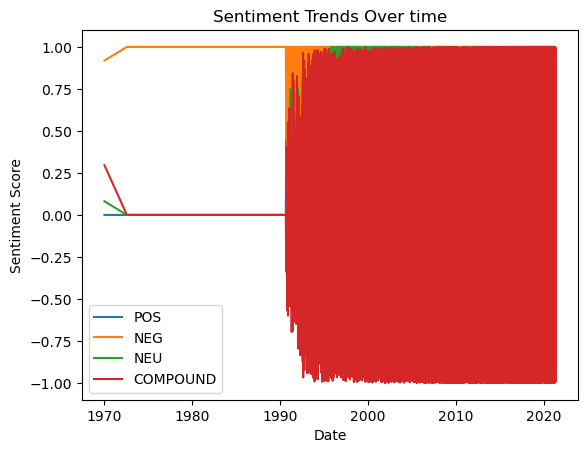

In [50]:
for col in daily_sentiment.columns:
    plt.plot(daily_sentiment.index,daily_sentiment[col],label=col.upper())
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends Over time')
plt.legend()
plt.show()    


NameError: name 'processed_df' is not defined

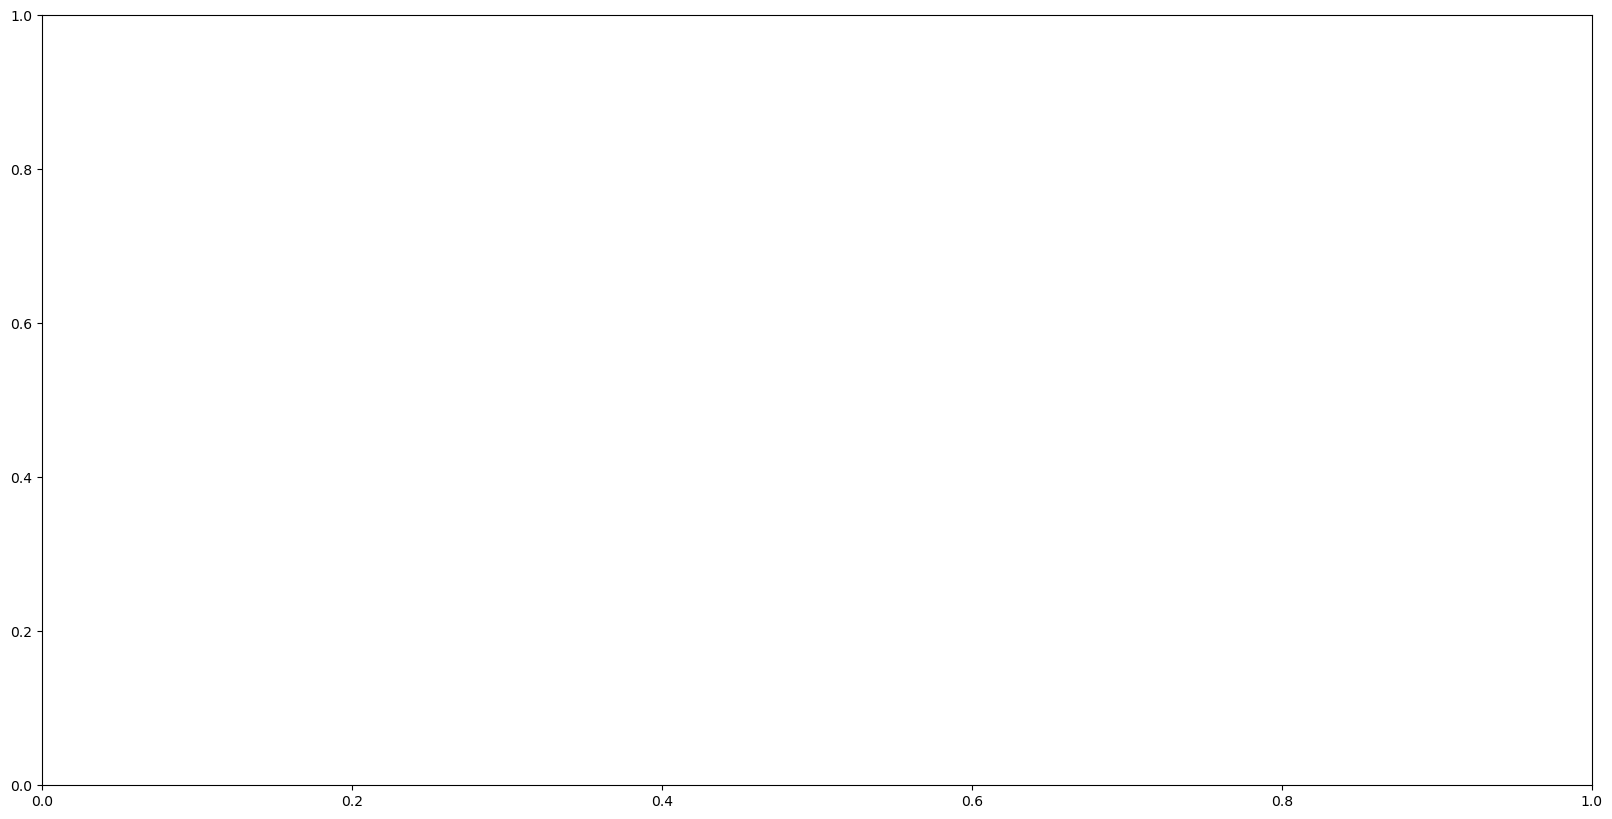

In [51]:
%matplotlib inline
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

fig4, ax4 = plt.subplots(figsize=(20, 10))

# Group data by repo and year
year_df = processed_df.groupby(['repo', 'year']).date.sum().reset_index().sort_values(['repo', 'year'])

# Get unique repos
repos = year_df['repo'].unique()

def get_all_year(year):
    ax4.clear()
    ax4.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    
    for repo in repos:
        repo_df = year_df[(year_df.repo == repo) & (year_df.year <= year)]
        line, = ax4.plot(repo_df.year, repo_df.date, label=repo, color=color[repo])

    ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax4.set_xlabel('Year', size=20)
    ax4.set_ylabel('Number of commits', size=20)
    ax4.set_title('Number of commits per year', size=20)

# Loop through years and update the plot
for year in range(processed_df.year.min(), processed_df.year.max() + 1):
    get_all_year(year)
    display(fig4)
    clear_output(wait=True)
